In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df=pd.read_csv("data_final.csv")
pd.set_option('display.max_columns',None)
df.head(10)

,url,url_length,num_dash,num_dot,num_ampersand,num_percent,num_underscore,num_at,num_hashtag,num_colon,num_semicolon,num_double_dash,num_special_character,num_numeric,num_sensitive_words,path_length,path_level,hostname_length,use_top_domain_level,is_https,has_ip_address,query_length,num_query,num_iframe,num_embed,num_external_url,num_external_domain,num_external_resource_call,num_null_self_redirect_hyperlink,num_submit_info_to_email,is_frequent_domain_name_mismatch,has_insecure_form,num_ext_meta_scipt_link,num_dns_record,num_redirect,num_redirect_diff_domain,right_click_dissabled,has_ext_favicon,is_domain_registered,is_domain_registrar_visible,domain_age,is_indexed,is_ssl_certificated,is_privacy_protected,has_onmouseover,status
0,http://www.crestonwood.com/router.php,37,0,3,0,0,0,0,0,1,0,1,3,0,0,11,1,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,15,1,0,0,0,0
1,https://shadetreetechnology.com/V4/validation/...,78,0,1,0,0,0,0,0,1,0,1,1,17,0,47,3,23,1,1,0,0,0,0,0,1,2,8,0,0,1,0,5,2,1,0,0,0,1,1,18,1,1,0,0,1
2,https://rgipt.ac.in/,20,0,2,0,0,0,0,0,1,0,1,2,0,0,1,1,11,0,1,0,0,0,0,0,66,0,68,5,0,0,0,0,4,1,0,0,0,1,1,16,1,1,0,0,0
3,http://www.iracing.com/tracks/gateway-motorspo...,55,2,2,0,0,0,0,0,1,0,1,4,0,0,33,3,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,1,25,1,1,0,0,0
4,https://www.mutuo.it/,21,0,2,0,0,0,0,0,1,0,1,2,0,0,1,1,12,1,1,0,0,0,0,0,11,5,97,0,0,0,0,48,2,1,0,0,1,1,1,23,1,1,0,0,0
5,http://www.shadetreetechnology.com/V4/validati...,81,0,2,0,0,0,0,0,1,0,1,2,21,0,47,3,27,1,0,0,0,0,0,0,1,2,8,0,0,1,0,5,2,0,0,0,0,1,1,18,1,0,0,0,1
6,https://parade.com/425836/joshwigler/the-amazi...,104,10,1,0,0,0,0,0,1,0,1,11,8,0,86,4,10,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,2,0,0,0,0,1,1,28,1,1,0,0,0
7,https://www.astrologyonline.eu/Astro_MemoNew/P...,56,0,3,0,0,1,0,0,1,0,1,4,0,0,26,2,22,0,1,0,0,0,4,1,4,3,16,0,0,0,0,5,4,0,0,0,0,1,1,0,1,1,0,0,0
8,https://www.lifewire.com/tcp-port-21-818146,43,3,2,0,0,0,0,0,1,0,1,5,8,0,19,1,16,1,1,0,0,0,2,0,24,5,62,4,0,0,0,14,8,0,0,0,0,1,1,24,1,1,0,0,0
9,https://technofizi.net/top-best-mp3-downloader...,83,9,1,0,0,0,0,0,1,0,1,10,1,0,61,2,14,1,1,0,0,0,12,0,106,7,110,8,0,0,0,62,2,0,0,0,0,0,1,7,1,1,0,1,0


In [3]:
df.isnull().sum()

url                                 0
url_length                          0
num_dash                            0
num_dot                             0
num_ampersand                       0
num_percent                         0
num_underscore                      0
num_at                              0
num_hashtag                         0
num_colon                           0
num_semicolon                       0
num_double_dash                     0
num_special_character               0
num_numeric                         0
num_sensitive_words                 0
path_length                         0
path_level                          0
hostname_length                     0
use_top_domain_level                0
is_https                            0
has_ip_address                      0
query_length                        0
num_query                           0
num_iframe                          0
num_embed                           0
num_external_url                    0
num_external

In [4]:
fig=px.pie(df,values=df["status"].value_counts(),
names=["Safe","Malicious"],title="<b>Status of URL", hole=.5, color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")


fig.update_layout(title_font_size=40)
fig.update_traces(textinfo='value')
fig.show()

C:\Users\Destyn\AppData\Local\Temp\ipykernel_19940\3411632851.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

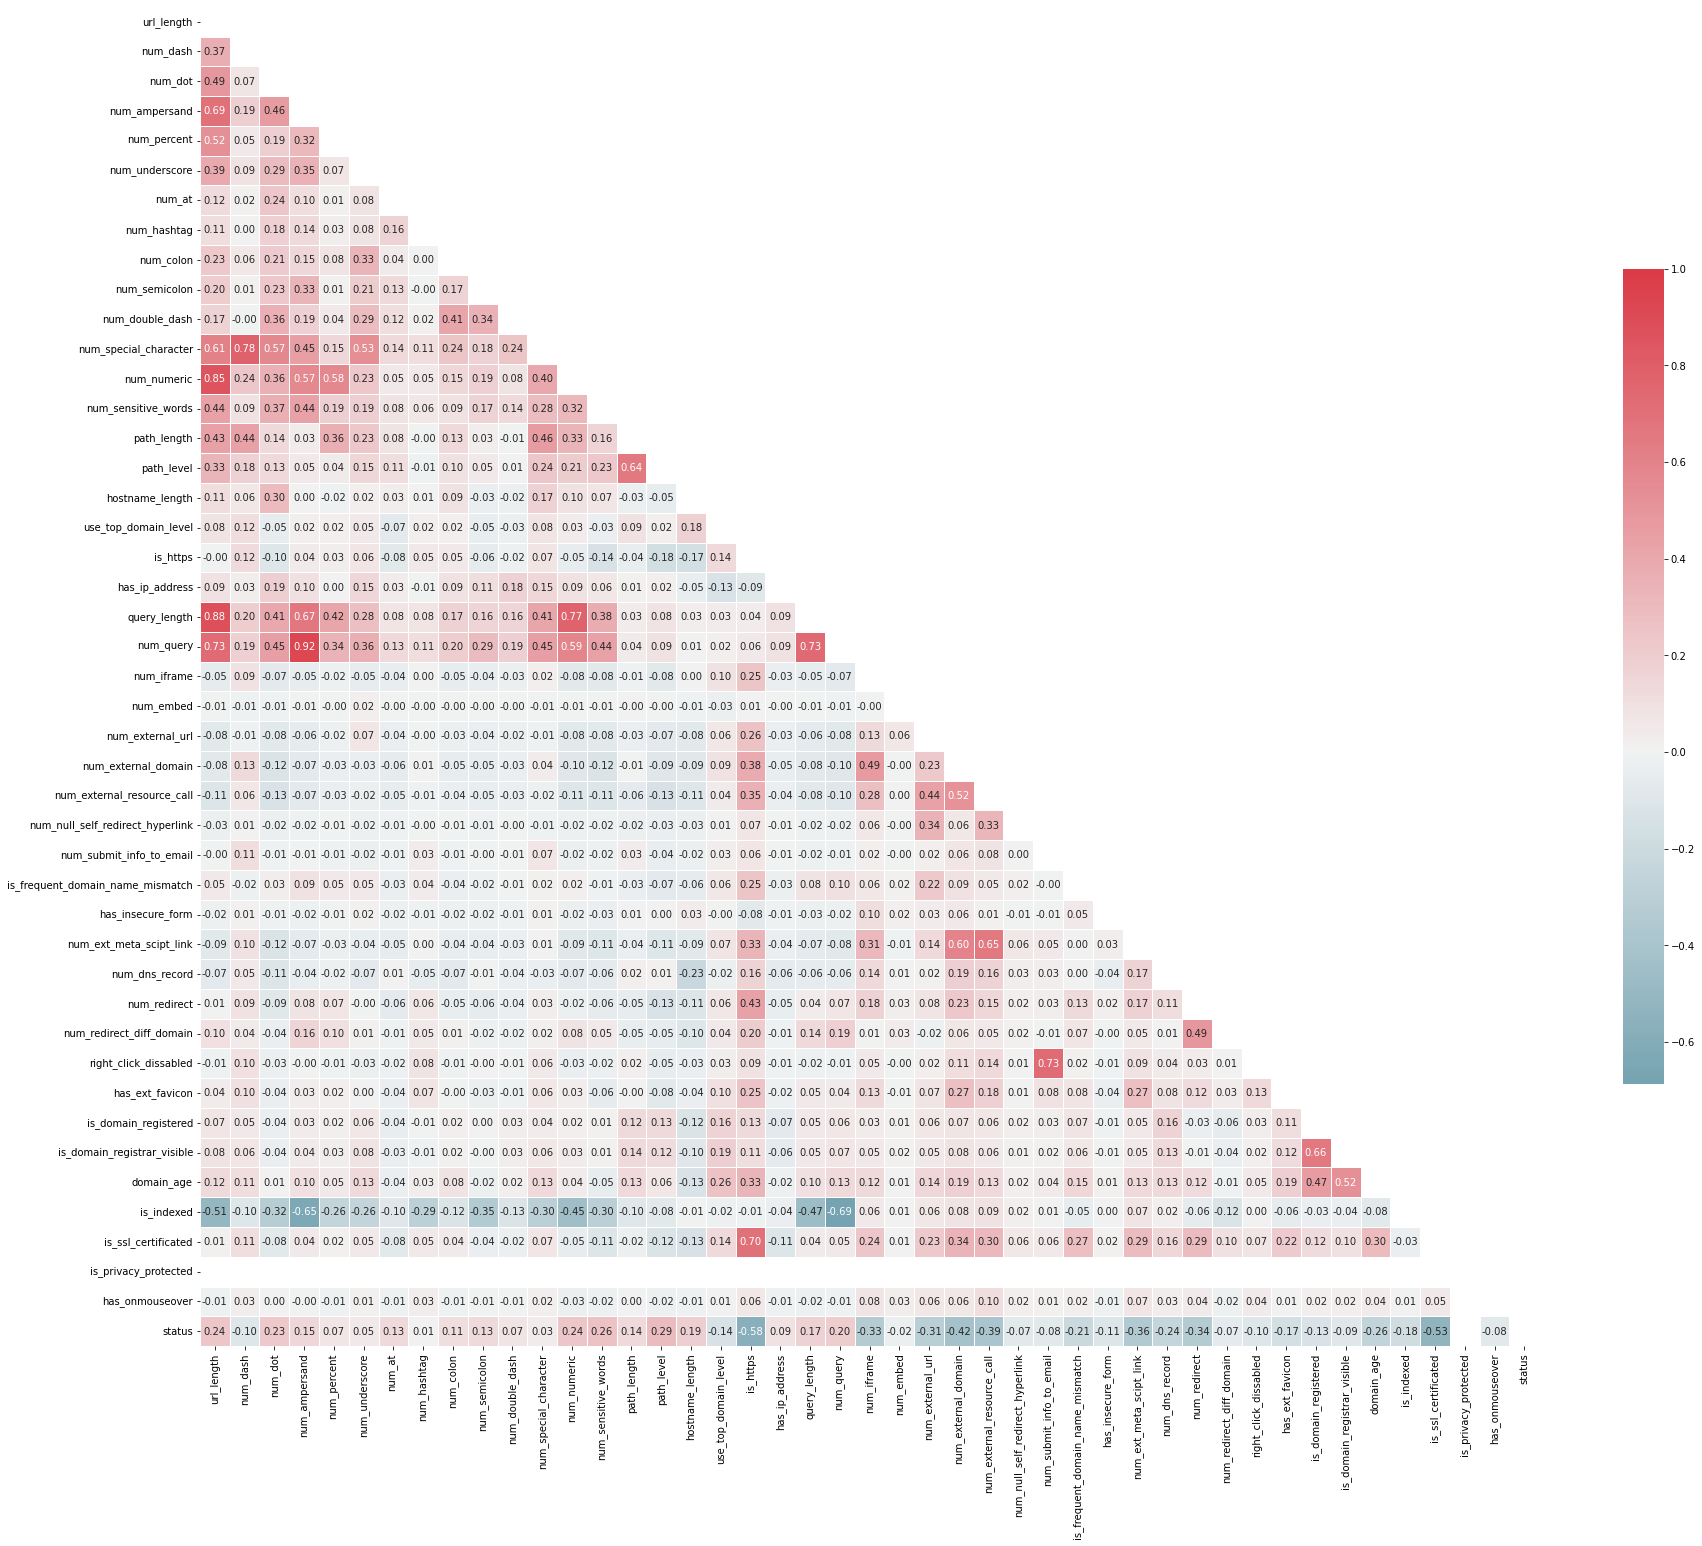

In [5]:
corr_without_url=df.drop(['url'],axis=1)
corrURL=corr_without_url.corr()

mask = np.triu(np.ones_like(corrURL, dtype=np.bool))
f, ax = plt.subplots(figsize=(30, 30))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(corrURL, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,fmt='.2f')


Since there are too many parameters, we shall split the parameters into `2 sub-categories`:  

1. `Lexical Feature` : Features that are extracted from the URL itself  
2. `Content Based Feature` : Features that are extracted from the webpage (HTML,Javascript)  

The objective is to filter out the determining factors and eliminate those that are not necessary such that our model will be clean and accurate for training and testing.

### Lexical Features

Lexical Features are features that can be extracted from the URL string itself

<AxesSubplot:>

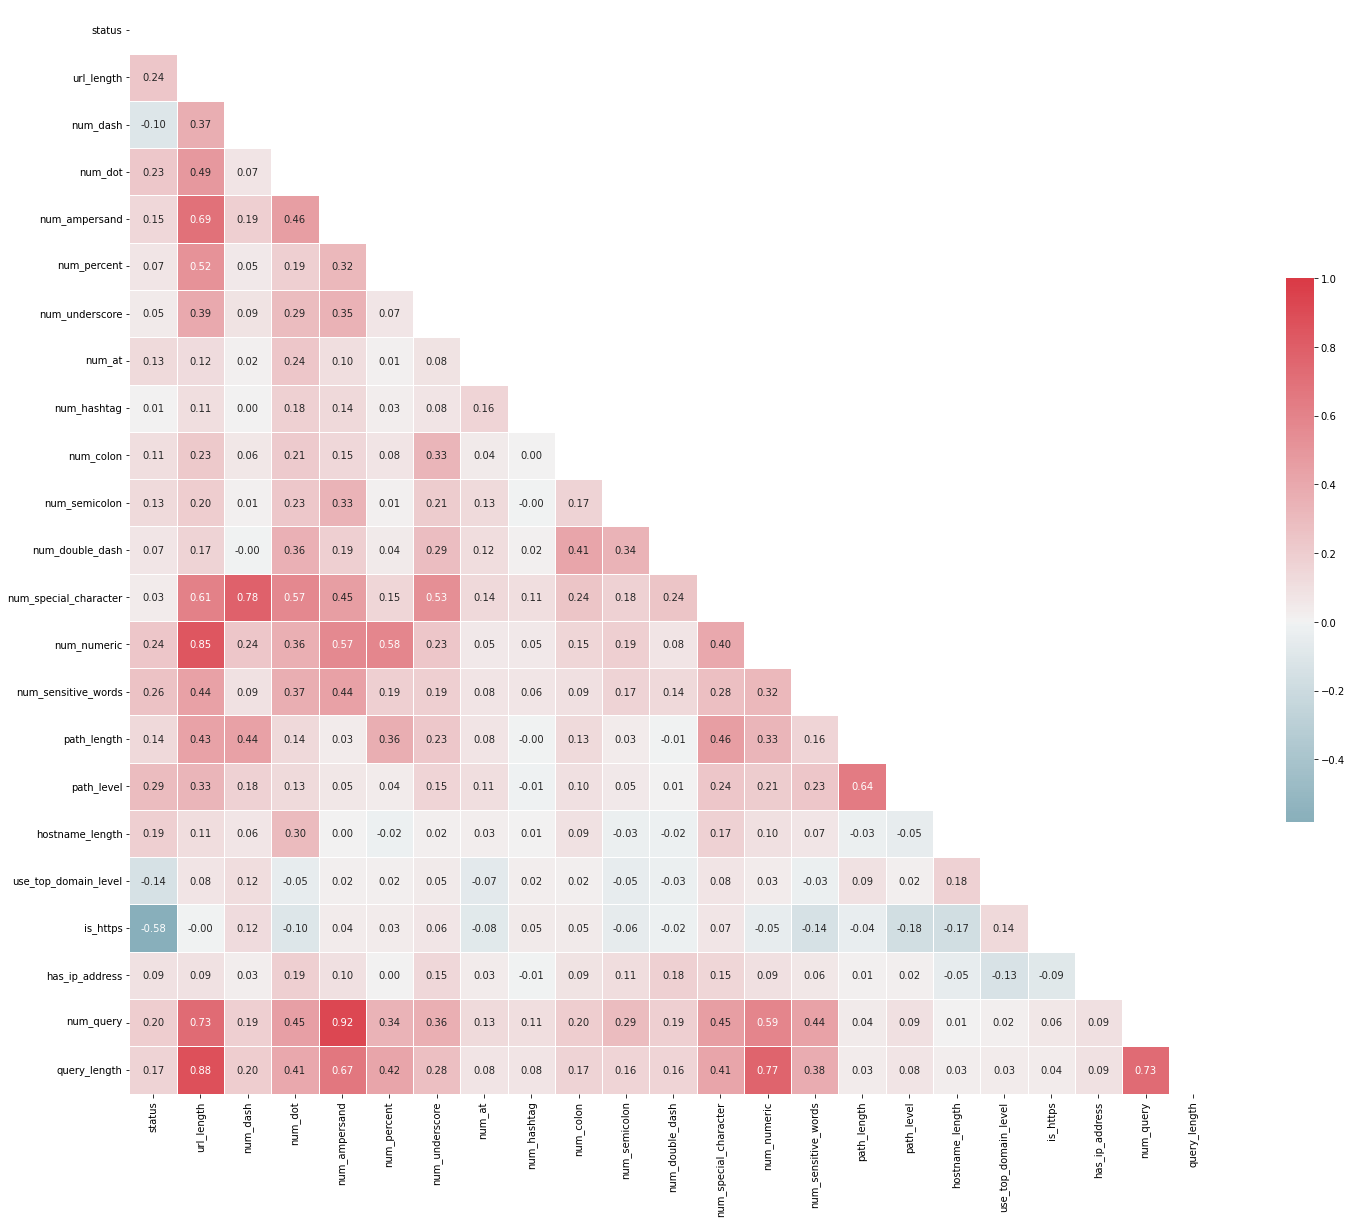

In [6]:
status=df[["status"]]
lexical=df[["url_length","num_dash","num_dot","num_ampersand","num_percent",
            "num_underscore","num_at","num_hashtag",'num_colon','num_semicolon',"num_double_dash",
            'num_special_character','num_numeric','num_sensitive_words','path_length','path_level',
            'hostname_length','use_top_domain_level','is_https','has_ip_address',"num_query","query_length"]]
lexicaldf=pd.concat([status,lexical],axis=1).reindex()

corr = lexicaldf.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 20))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')



As there are too many parameters, we shall analyze these features on a smaller scale

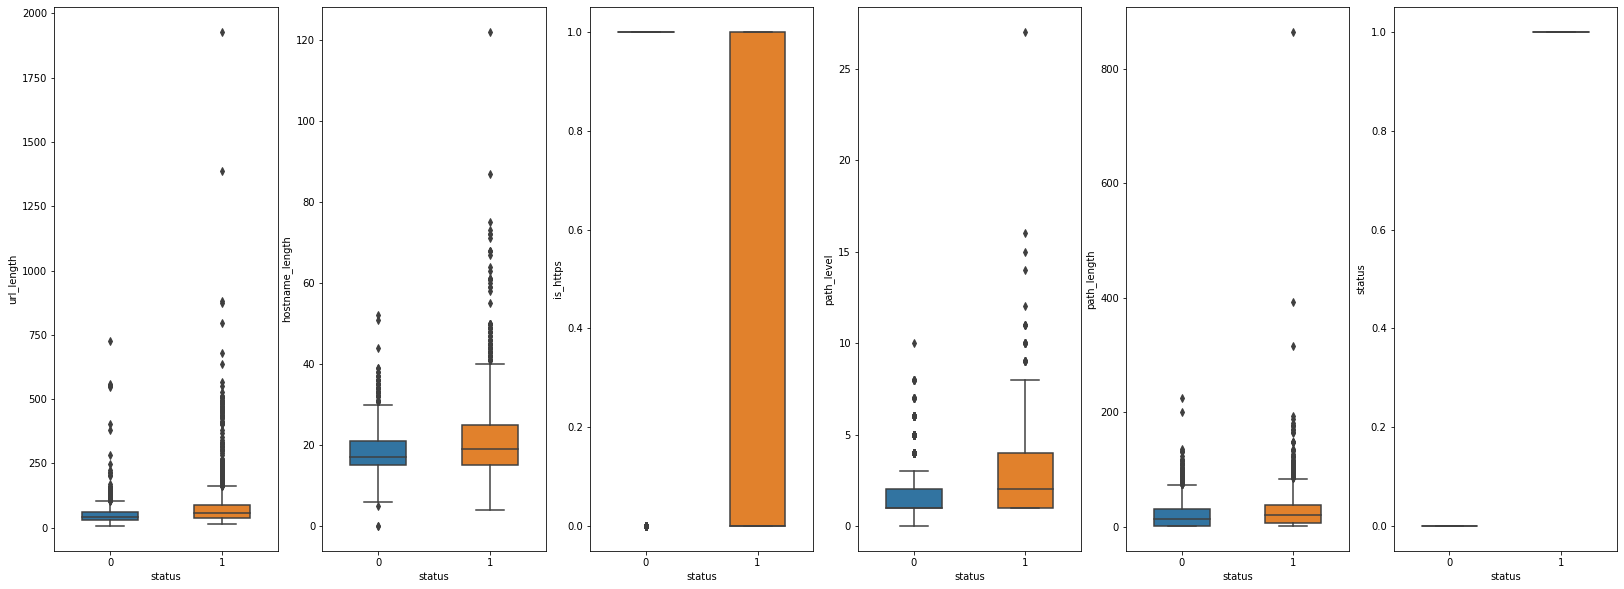

In [7]:
f,axes=plt.subplots(1,6,figsize=(28,10))

df1=lexical[["url_length","hostname_length","is_https","path_level","path_length"]]
df1subplot=pd.concat([df1, status],axis=1).reindex()
count=0
A=len(df1subplot)
for var in df1subplot:
    sb.boxplot(x='status', y=var,data=df1subplot,ax=axes[count],width=.5)
    count+=1

Results : `Malicious URL` associated with longer URL length, longer hostname, longer path length and more path levels in general

However, we note that `is_https` requires `further analysis`


In [8]:
https=df['is_https']
httpsStatus=pd.concat([https,status],axis=1).reindex()
httpsStatus.value_counts()

is_https  status
1         0         2605
0         1         1428
1         1          554
0         0          443
dtype: int64

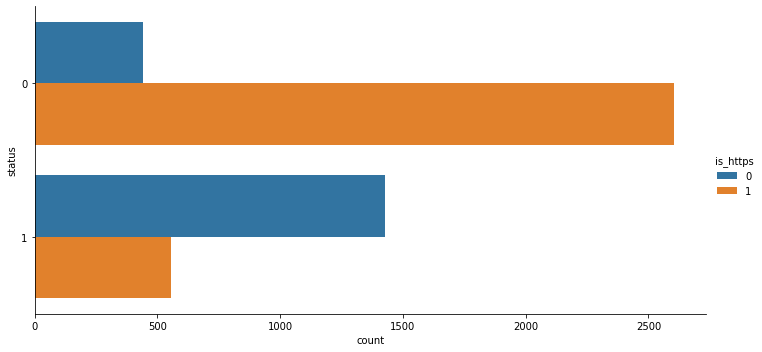

In [9]:
sb.catplot(data=httpsStatus, y="status",hue="is_https",kind="count",aspect=2)

From the above catplot, we can observe that generally malicious URL has lesser counts of https.   

However, we note that even if a URL has secured http (https), it can still be malicious

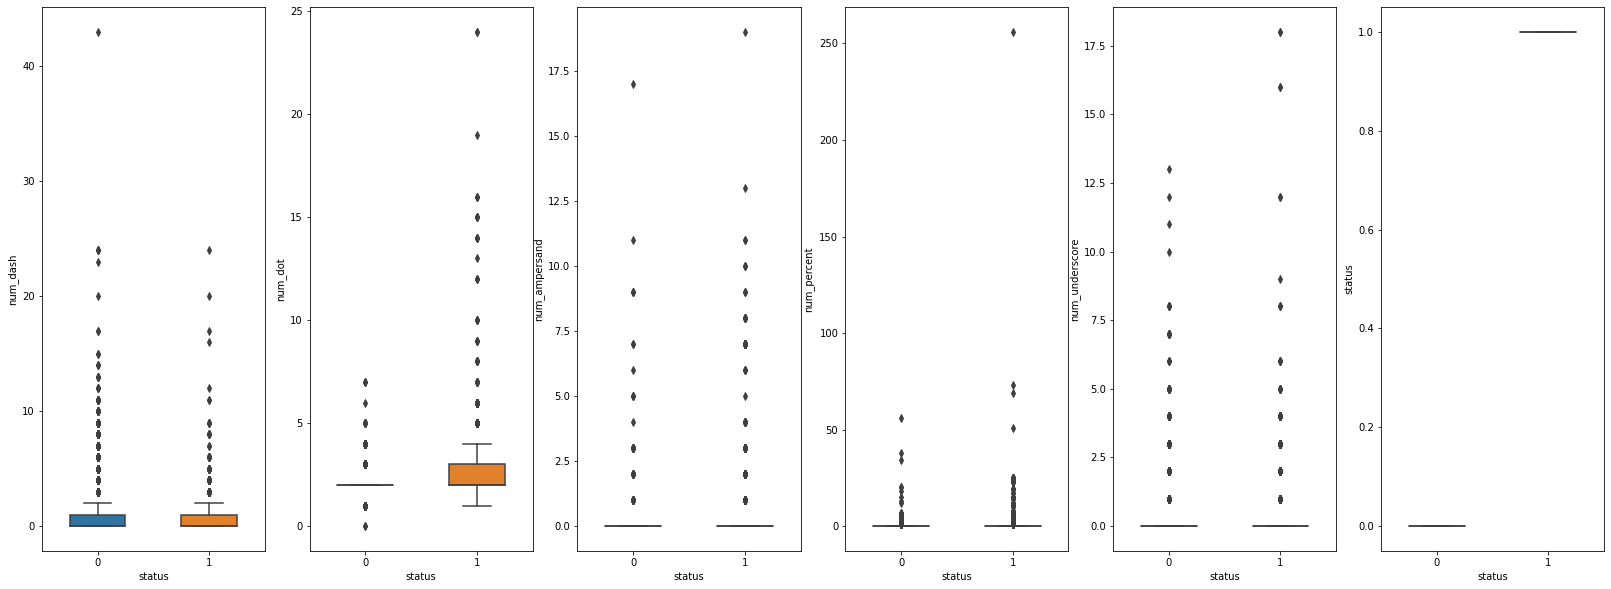

In [10]:
f,axes=plt.subplots(1,6,figsize=(28,10))

df2=lexical[["num_dash","num_dot","num_ampersand","num_percent","num_underscore"]]
df2subplot=pd.concat([df2, status],axis=1).reindex()
count=0
for var in df2subplot:
    sb.boxplot(x='status', y=var,data=df2subplot,ax=axes[count],width=.5)
    count+=1

In [11]:
dash=df['num_dash']
dashStatus=pd.concat([dash,status],axis=1).reindex()
dashStatus.value_counts()

num_dash  status
0         0         1906
          1         1196
1         1          446
          0          410
2         0          207
          1          191
4         0          142
3         0          118
5         0           70
3         1           64
6         0           46
7         0           43
4         1           36
9         0           30
8         0           26
5         1           17
10        0           14
11        0           13
6         1           12
8         1            6
13        0            5
9         1            5
12        0            4
24        0            4
14        0            3
11        1            2
7         1            2
15        0            2
17        0            2
12        1            1
16        1            1
17        1            1
20        0            1
          1            1
23        0            1
24        1            1
43        0            1
dtype: int64

Results : `num_dash, num_percent,num_ampersand,num_underscore` are not determining factors in predicting the legitamacy of a URL

However, according to our primary research, we found that number of ampersand (related to query) and number of percentages (precent encoding) does impact the legitamacy of a URL.

It is observed that malicious URL has significantly highly number of `dots`

`To Drop` : num_percent, num_underscore 

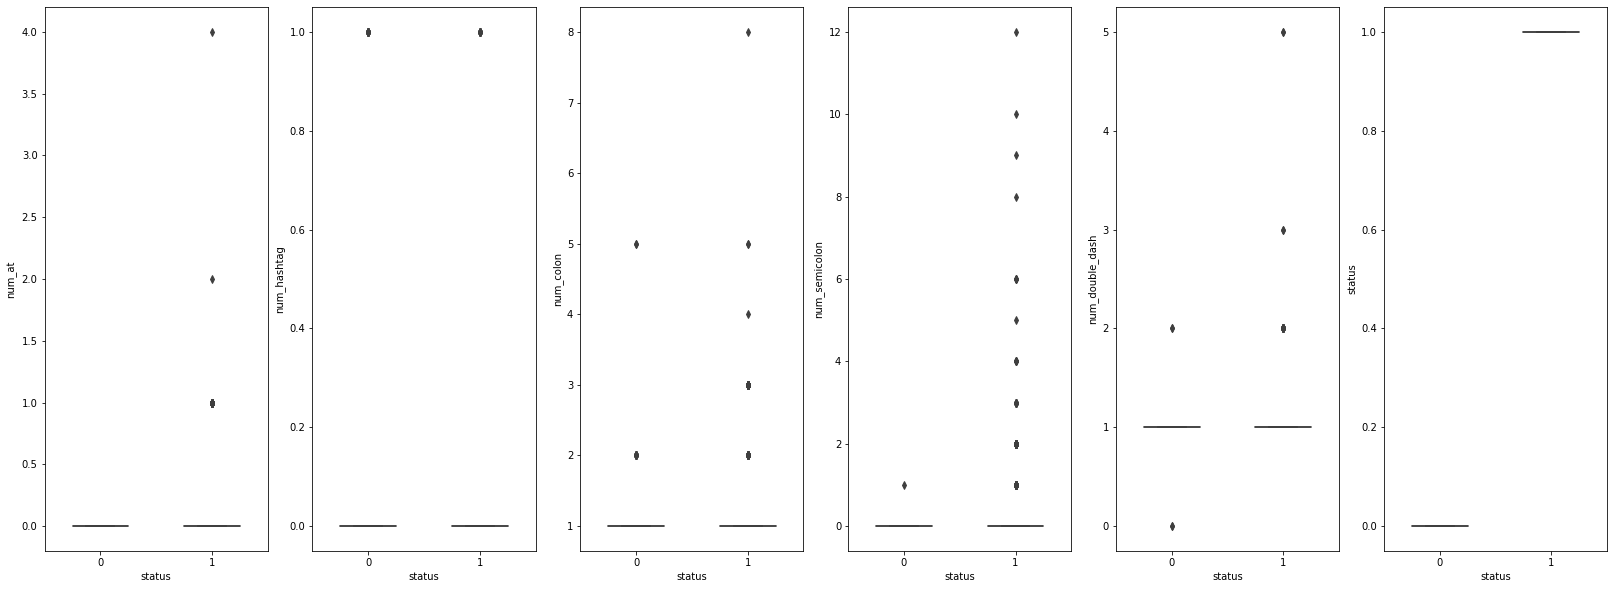

In [12]:
f,axes=plt.subplots(1,6,figsize=(28,10))

df3=lexical[["num_at","num_hashtag","num_colon","num_semicolon","num_double_dash"]]
df3subplot=pd.concat([df3, status],axis=1).reindex()
count=0
for var in df3subplot:
    sb.boxplot(x='status', y=var,data=df3subplot,ax=axes[count],width=.5)
    count+=1

In [13]:
df['num_at'].value_counts()

0    4964
1      64
2       1
4       1
Name: num_at, dtype: int64

In [14]:
at=df['num_at']
atStatus=pd.concat([at,status],axis=1).reindex()
atStatus.value_counts()

num_at  status
0       0         3048
        1         1916
1       1           64
2       1            1
4       1            1
dtype: int64

In [15]:
dd=df['num_double_dash']
ddStatus=pd.concat([dd,status],axis=1).reindex()
ddStatus.value_counts()

num_double_dash  status
1                0         3044
                 1         1957
2                1           21
0                0            2
2                0            2
3                1            2
5                1            2
dtype: int64

Results : `num_double_dash` not a determining factor and hence we shall exclude this parameter.

`num_at` showed rather significant correlation against status

Since there are zero entries of `num_hastag` , we shall not remove this parameter. 

`To Drop` : num_hashtag and num_double_dash

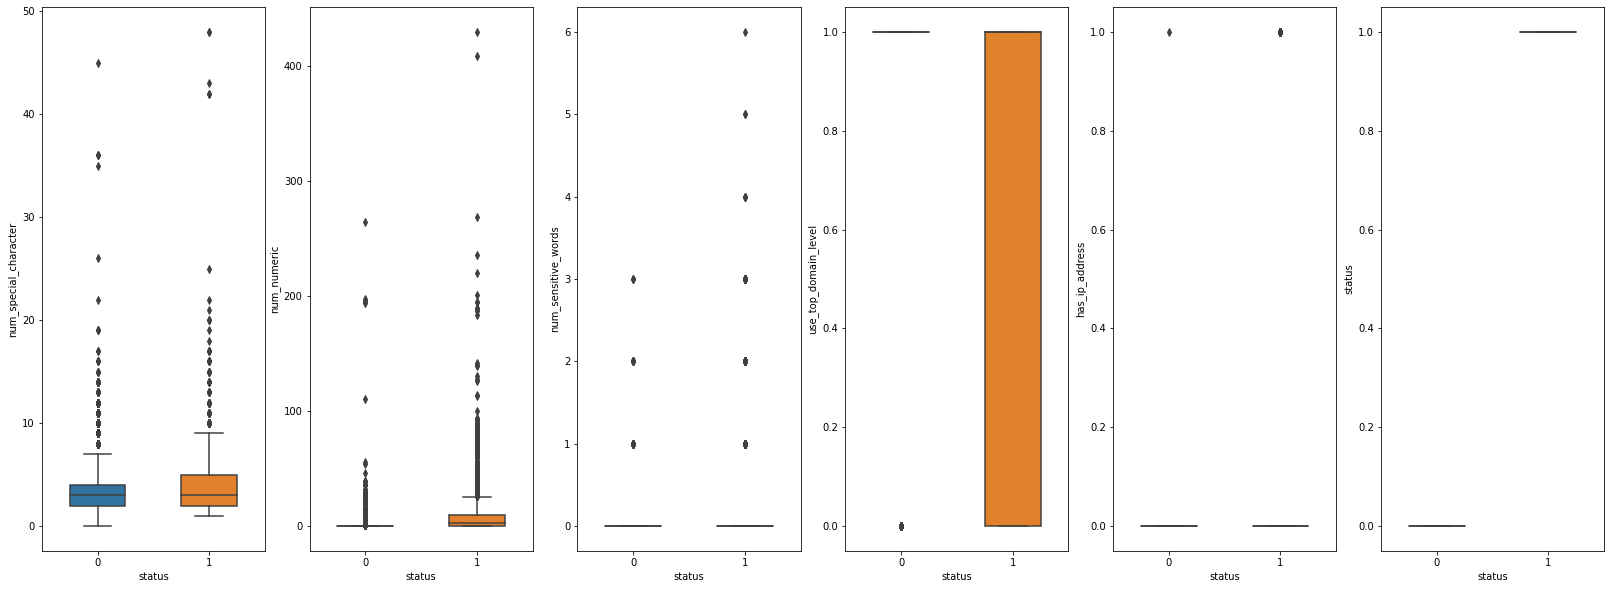

In [16]:
f,axes=plt.subplots(1,6,figsize=(28,10))

df4=lexical[["num_special_character","num_numeric","num_sensitive_words","use_top_domain_level","has_ip_address"]]
df4subplot=pd.concat([df4, status],axis=1).reindex()
count=0
for var in df4subplot:
    sb.boxplot(x='status', y=var,data=df4subplot,ax=axes[count],width=.5)
    count+=1

In [17]:
topdomain=df['use_top_domain_level']
tdStatus=pd.concat([topdomain,status],axis=1).reindex()
tdStatus.value_counts()

use_top_domain_level  status
1                     0         2540
                      1         1419
0                     1          563
                      0          508
dtype: int64

In [18]:
ip_address=df['has_ip_address']
ipStatus=pd.concat([ip_address, status],axis=1).reindex()
ipStatus.value_counts()

has_ip_address  status
0               0         3047
                1         1954
1               1           28
                0            1
dtype: int64



`Results` Since all entries with ip address are malicious URL, we shall include this parameter eventhough the correlation is about 0.06 which is significantly low.

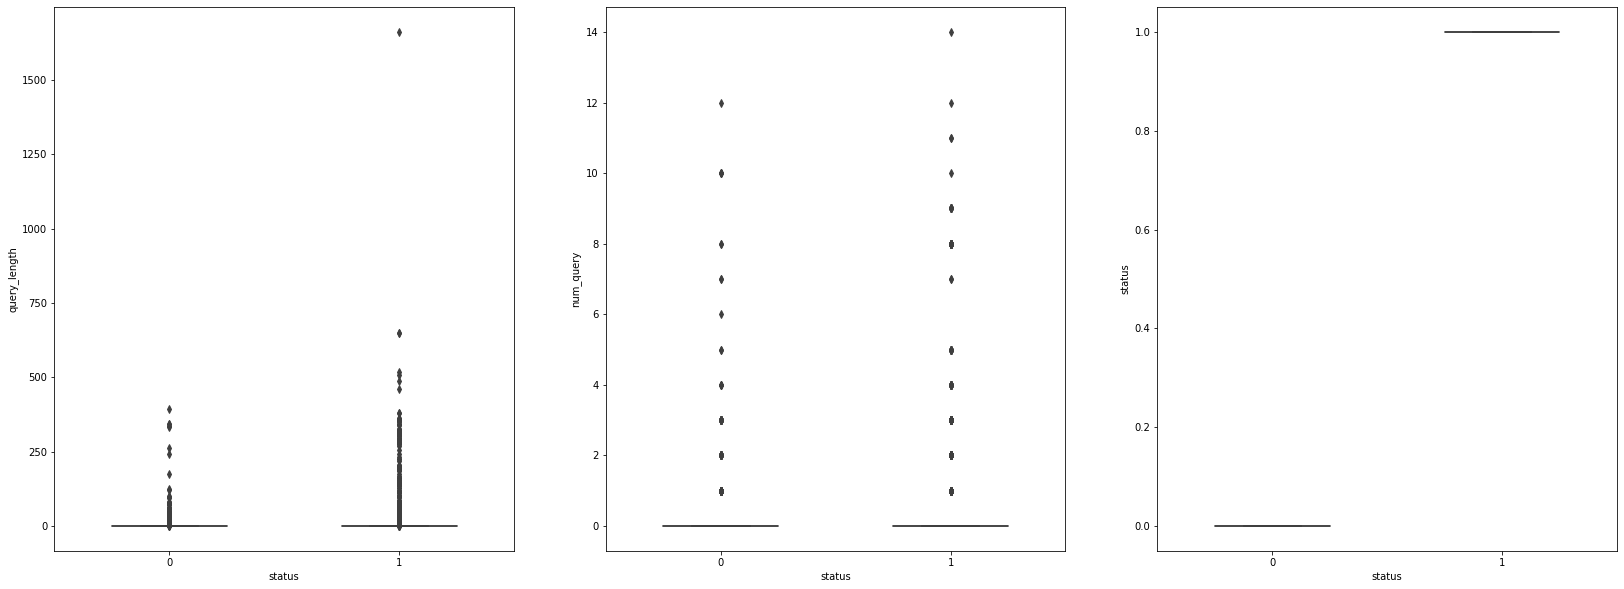

In [19]:
f,axes=plt.subplots(1,3,figsize=(28,10))

df5=lexical[["query_length","num_query"]]
df5subplot=pd.concat([df5, status],axis=1).reindex()
count=0
for var in df5subplot:
    sb.boxplot(x='status', y=var,data=df5subplot,ax=axes[count],width=.5)
    count+=1

Total lexical features to drop : `num_hashtag`, `num_percent`,`num_underscore`,`num_double_dash`

### Content Based Features

In [20]:
dfContent=df.drop(lexical,axis=1)
dfContent.head()

,url,num_iframe,num_embed,num_external_url,num_external_domain,num_external_resource_call,num_null_self_redirect_hyperlink,num_submit_info_to_email,is_frequent_domain_name_mismatch,has_insecure_form,num_ext_meta_scipt_link,num_dns_record,num_redirect,num_redirect_diff_domain,right_click_dissabled,has_ext_favicon,is_domain_registered,is_domain_registrar_visible,domain_age,is_indexed,is_ssl_certificated,is_privacy_protected,has_onmouseover,status
0,http://www.crestonwood.com/router.php,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,15,1,0,0,0,0
1,https://shadetreetechnology.com/V4/validation/...,0,0,1,2,8,0,0,1,0,5,2,1,0,0,0,1,1,18,1,1,0,0,1
2,https://rgipt.ac.in/,0,0,66,0,68,5,0,0,0,0,4,1,0,0,0,1,1,16,1,1,0,0,0
3,http://www.iracing.com/tracks/gateway-motorspo...,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,1,25,1,1,0,0,0
4,https://www.mutuo.it/,0,0,11,5,97,0,0,0,0,48,2,1,0,0,1,1,1,23,1,1,0,0,0


<AxesSubplot:>

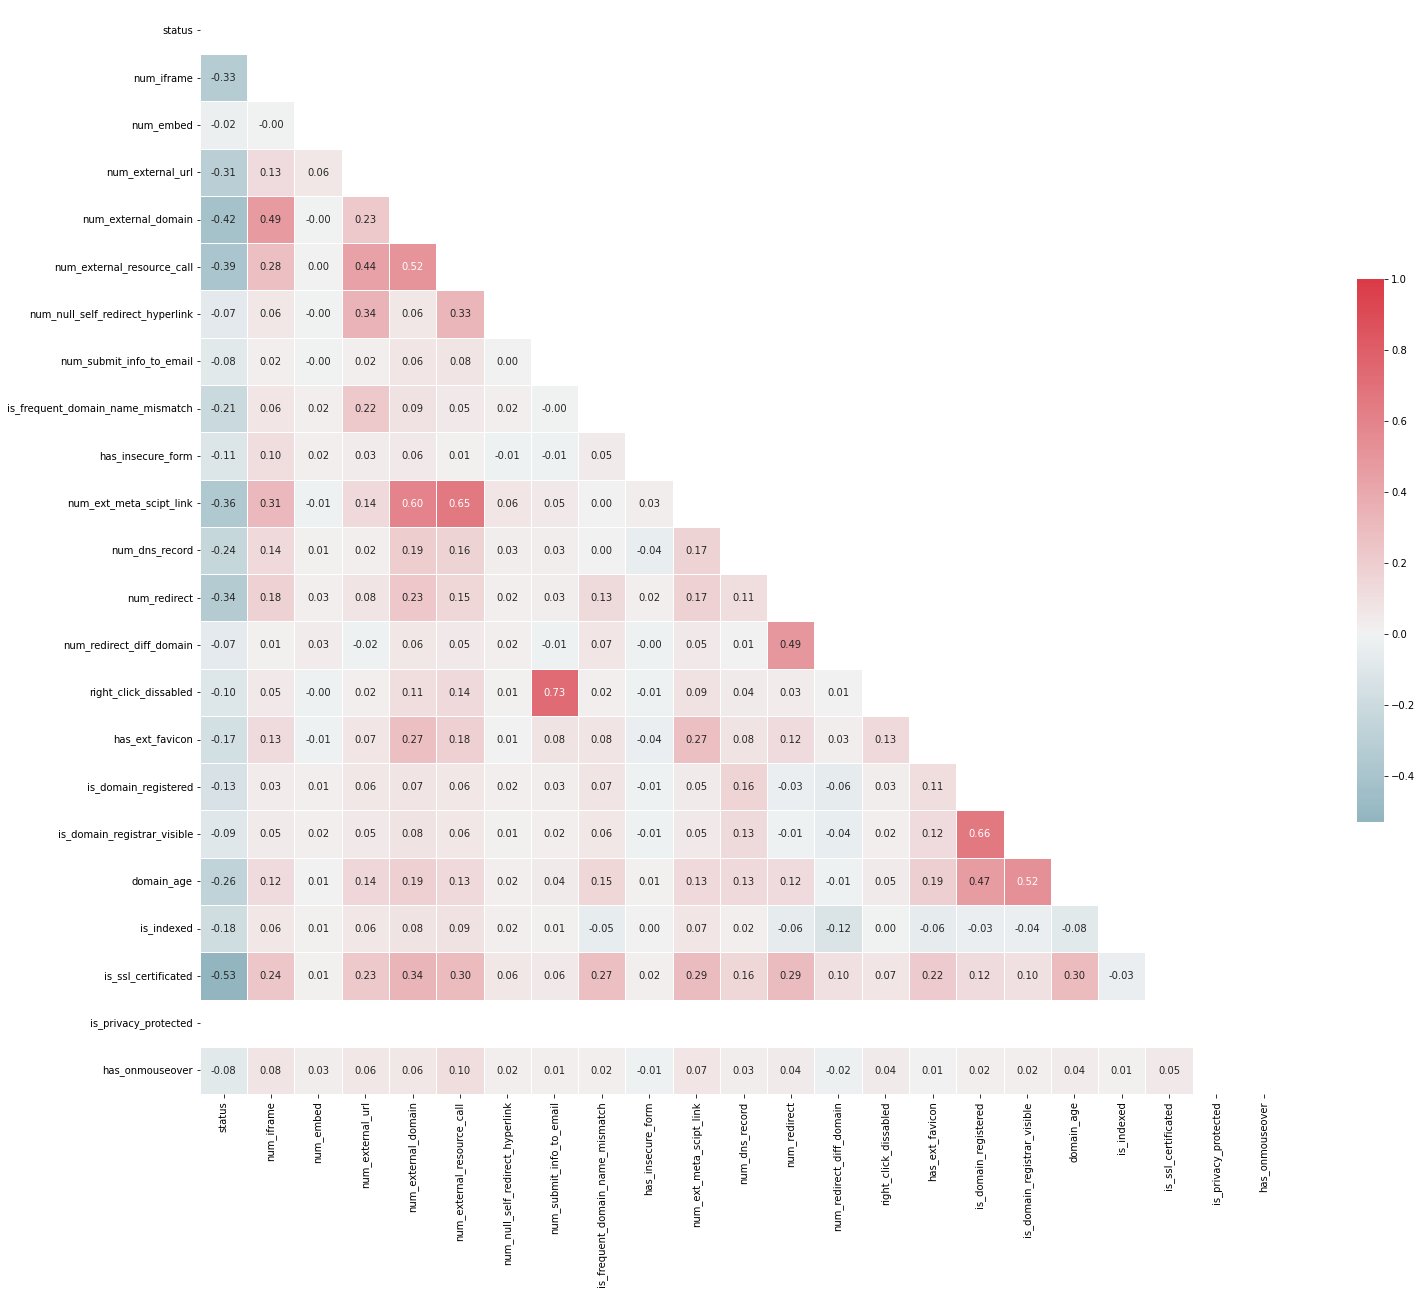

In [21]:
dfContent=dfContent.drop(['status'],axis=1)
contentBased=pd.concat([status,dfContent],axis=1).reindex()

CBcorr = contentBased.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(CBcorr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 20))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(CBcorr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')



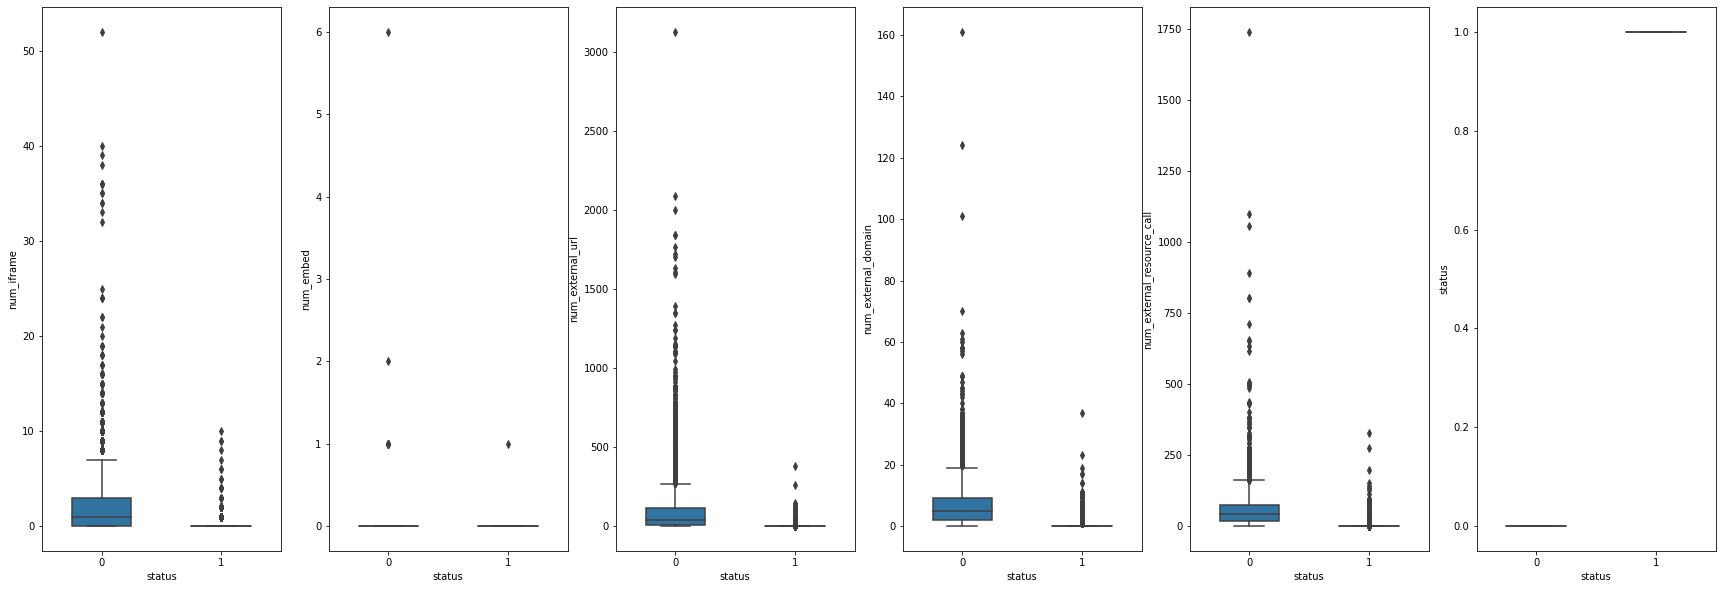

In [22]:
f,axes=plt.subplots(1,6,figsize=(30,10))

CBdf1=dfContent[["num_iframe","num_embed","num_external_url","num_external_domain","num_external_resource_call"]]
CBdf1subplot=pd.concat([CBdf1, status],axis=1).reindex()
count=0

for var in CBdf1subplot:
    sb.boxplot(x='status', y=var,data=CBdf1subplot,ax=axes[count],width=.5)
    count+=1

In [23]:
embed=dfContent['num_embed']
embedStatus=pd.concat([embed,status],axis=1).reindex()
embedStatus.value_counts()


num_embed  status
0          0         3038
           1         1981
1          0            8
           1            1
2          0            1
6          0            1
dtype: int64

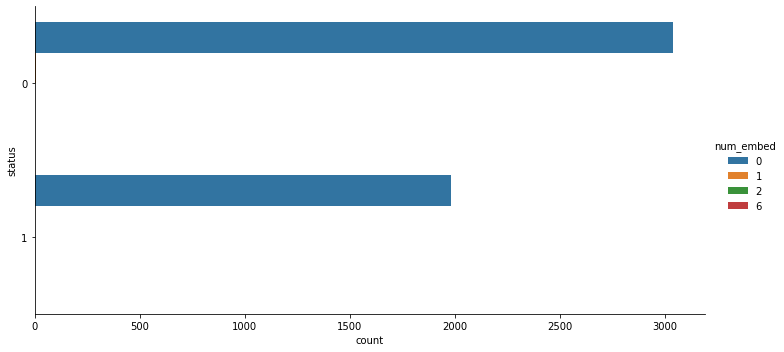

In [24]:
sb.catplot(data=embedStatus, y='status', hue='num_embed',kind='count',aspect=2)

`To Drop` : num_embed

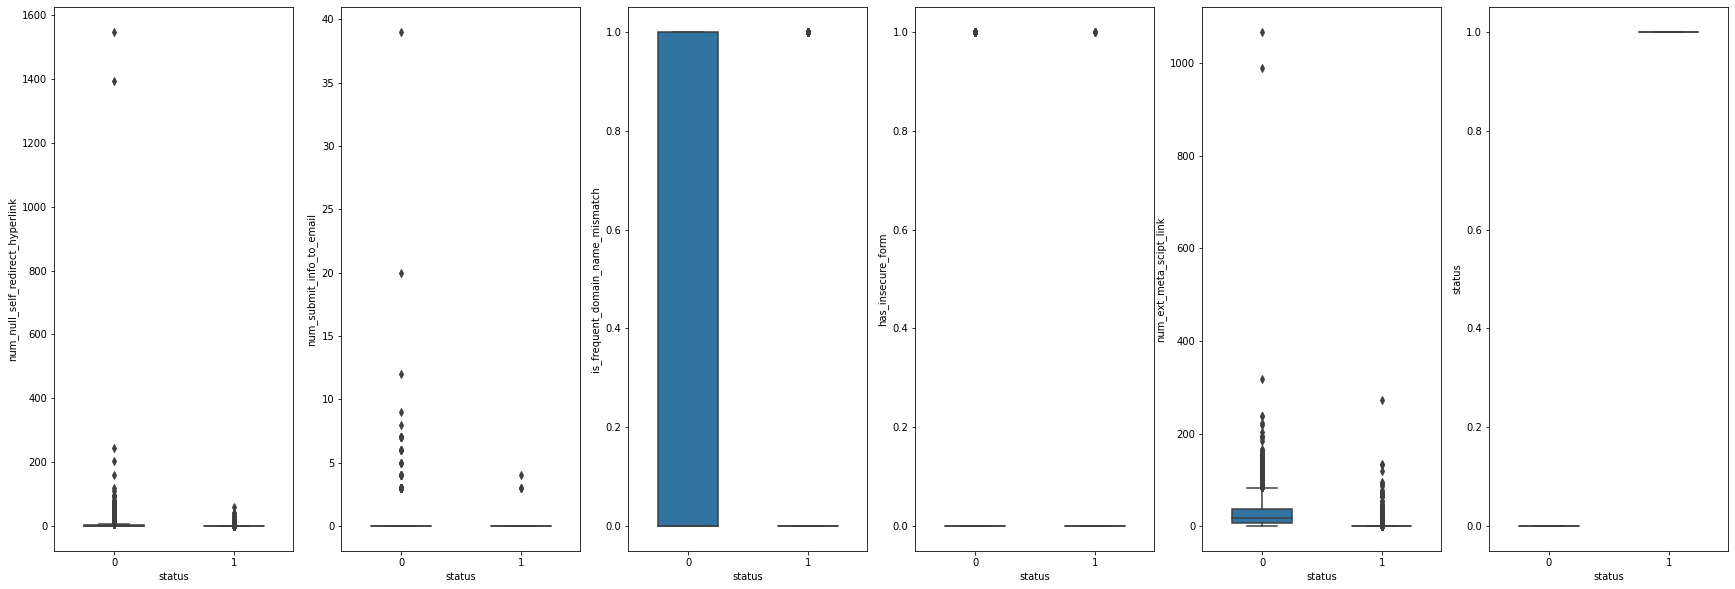

In [25]:
f,axes=plt.subplots(1,6,figsize=(30,10))

CBdf2=dfContent[["num_null_self_redirect_hyperlink","num_submit_info_to_email","is_frequent_domain_name_mismatch","has_insecure_form","num_ext_meta_scipt_link"]]
CBdf2subplot=pd.concat([CBdf2, status],axis=1).reindex()
count=0

for var in CBdf2subplot:
    sb.boxplot(x='status', y=var,data=CBdf2subplot,ax=axes[count],width=.5)
    count+=1

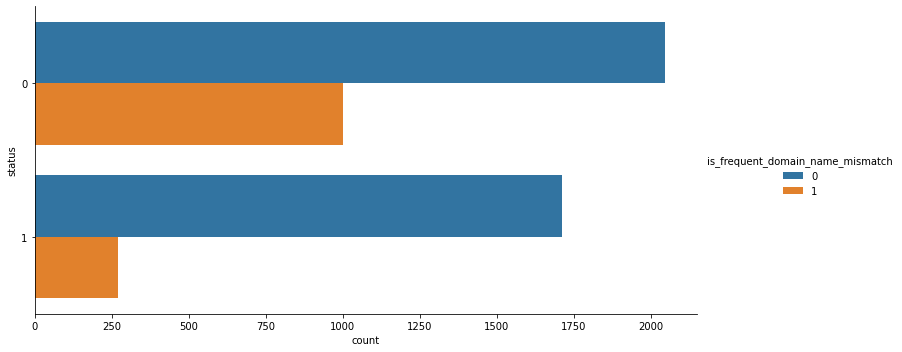

In [26]:
domain_mismatch=dfContent['is_frequent_domain_name_mismatch']
mismatchStatus=pd.concat([domain_mismatch,status],axis=1).reindex()
sb.catplot(data=mismatchStatus, y="status",hue="is_frequent_domain_name_mismatch",kind="count",aspect=2)

In [27]:
submitInfo=dfContent['num_submit_info_to_email']
infoStatus=pd.concat([submitInfo,status],axis=1).reindex()
infoStatus.value_counts()

num_submit_info_to_email  status
0                         0         2954
                          1         1978
3                         0           60
7                         0           10
4                         0            9
6                         0            6
5                         0            4
3                         1            3
4                         1            1
8                         0            1
9                         0            1
12                        0            1
20                        0            1
39                        0            1
dtype: int64

In [28]:
insecure=dfContent['has_insecure_form']
insecureStatus=pd.concat([insecure,status],axis=1).reindex()
insecureStatus.value_counts()

has_insecure_form  status
0                  0         2936
                   1         1977
1                  0          112
                   1            5
dtype: int64

Results : we can perhaps drop `num_submit_info_to_email`  

Even though the parameter `has_insecure_form` has shown significant low correlation, based on existing knowledge and data gathered from our primary research, we conclude this parameter should be included for more accurate analysis and prediction for our model.

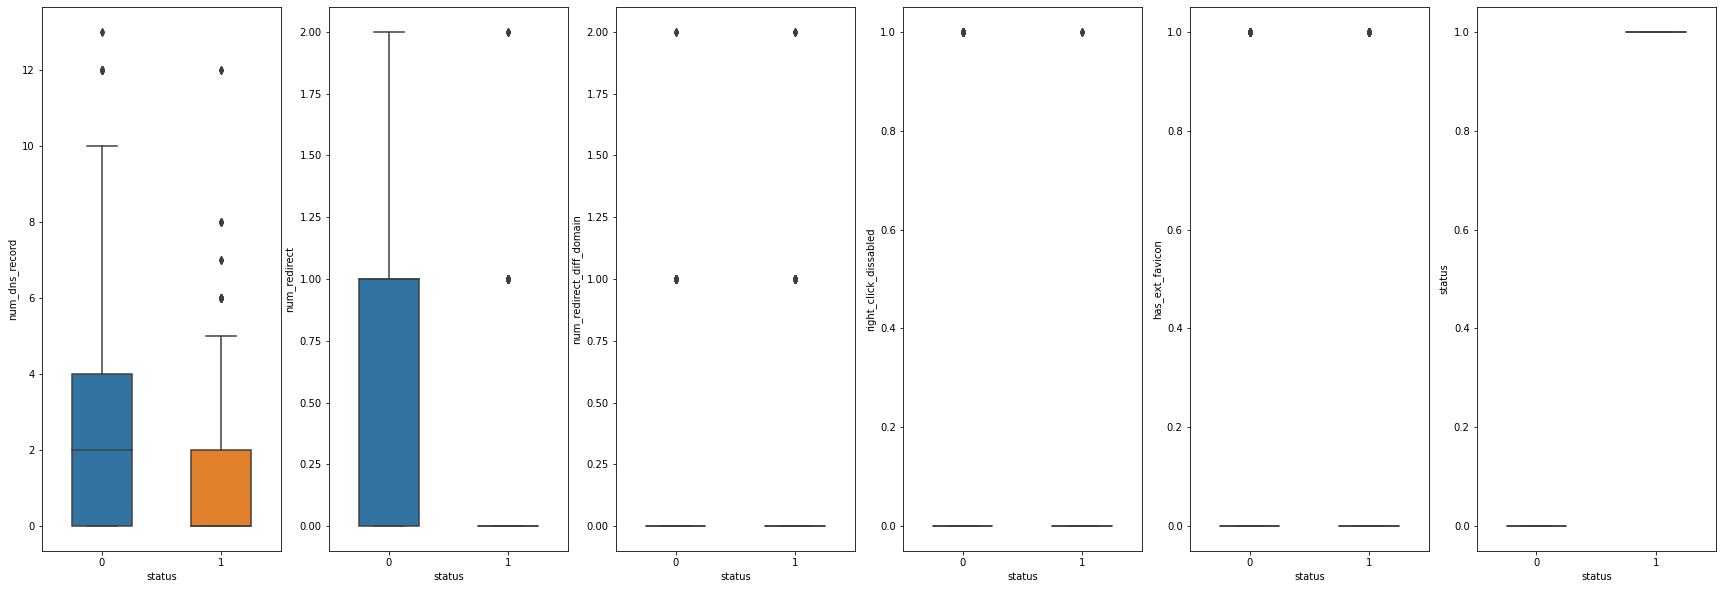

In [29]:
f,axes=plt.subplots(1,6,figsize=(30,10))

CBdf3=dfContent[["num_dns_record","num_redirect","num_redirect_diff_domain","right_click_dissabled","has_ext_favicon"]]
CBdf3subplot=pd.concat([CBdf3, status],axis=1).reindex()
count=0

for var in CBdf3subplot:
    sb.boxplot(x='status', y=var,data=CBdf3subplot,ax=axes[count],width=.5)
    count+=1

In [30]:
redirect=dfContent['num_redirect']
redirectStatus=pd.concat([redirect,status],axis=1).reindex()
redirectStatus.value_counts()
#sb.catplot(data=redirectStatus, y="status",hue="num_redirect",kind="count",aspect=2)


num_redirect  status
1             0         1625
0             1         1596
              0         1420
1             1          382
2             1            4
              0            3
dtype: int64

In [31]:
redirect_to_domain=dfContent['num_redirect_diff_domain']
RTDStatus=pd.concat([redirect_to_domain,status],axis=1).reindex()
RTDStatus.value_counts()

num_redirect_diff_domain  status
0                         0         2576
                          1         1771
1                         0          469
                          1          207
2                         1            4
                          0            3
dtype: int64

In [32]:
rightclick=dfContent['right_click_dissabled']
RCstatus=pd.concat([rightclick,status],axis=1).reindex()
RCstatus.value_counts()

right_click_dissabled  status
0                      0         2954
                       1         1978
1                      0           94
                       1            4
dtype: int64

In [33]:
favicon=dfContent['has_ext_favicon']
faviconStatus=pd.concat([favicon,status],axis=1).reindex()
faviconStatus.value_counts()

has_ext_favicon  status
0                0         2531
                 1         1873
1                0          517
                 1          109
dtype: int64

Results :   
`num_dns_record` : Safe URLs contains more dns records in general

Note that even if `has_ext_favicon` showed no obvious clues about the authenticity of a URL, we still include this parameter. Favicon can still be misused by having redirected malware attached it.  

We shall drop `right_click_dissabled` and `num_redirect_diff_domain`


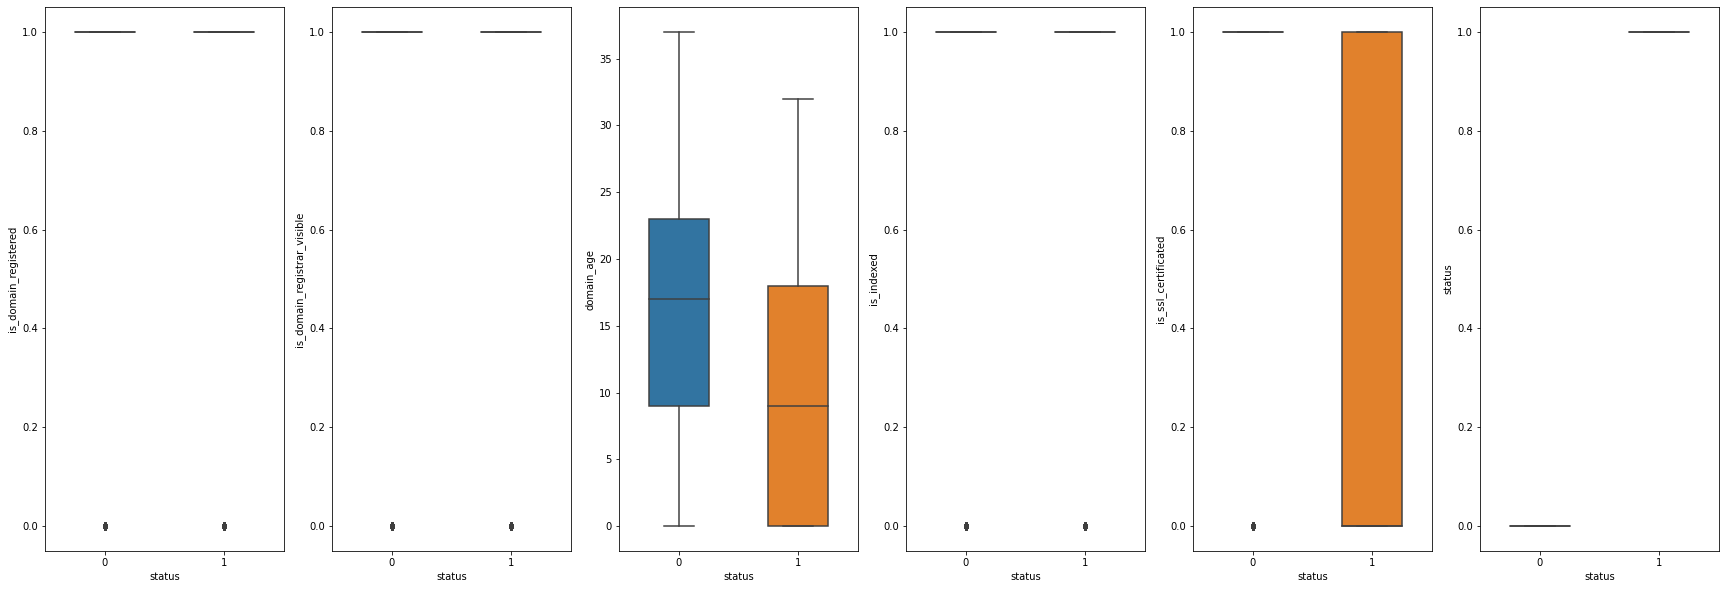

In [34]:
f,axes=plt.subplots(1,6,figsize=(30,10))

CBdf4=dfContent[["is_domain_registered","is_domain_registrar_visible","domain_age","is_indexed","is_ssl_certificated"]]
CBdf4subplot=pd.concat([CBdf4, status],axis=1).reindex()
count=0

for var in CBdf4subplot:
    sb.boxplot(x='status', y=var,data=CBdf4subplot,ax=axes[count],width=.5)
    count+=1

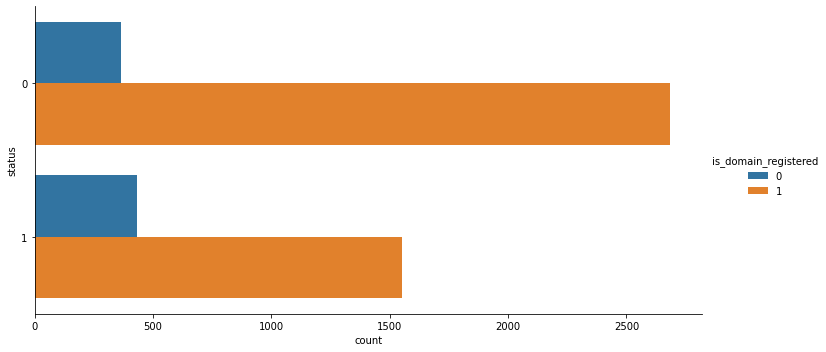

In [35]:
domainRegistered=dfContent['is_domain_registered']
dRstatus=pd.concat([domainRegistered,status],axis=1).reindex()
dRstatus.value_counts()
sb.catplot(data=dRstatus, y="status",hue="is_domain_registered",kind="count",aspect=2)

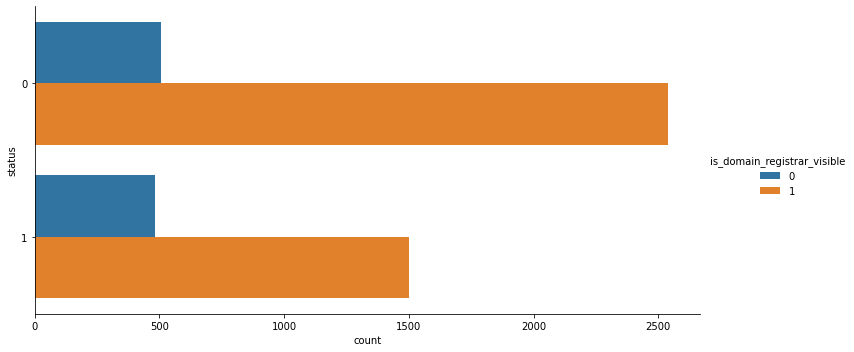

In [36]:
domainVisible=dfContent['is_domain_registrar_visible']
dVstatus=pd.concat([domainVisible,status],axis=1).reindex()
dVstatus.value_counts()
sb.catplot(data=dVstatus, y="status",hue="is_domain_registrar_visible",kind="count",aspect=2)

In [37]:
indexed=dfContent['is_indexed']
indexstatus=pd.concat([indexed,status],axis=1).reindex()
indexstatus.value_counts()

is_indexed  status
1           0         2944
            1         1722
0           1          260
            0          104
dtype: int64

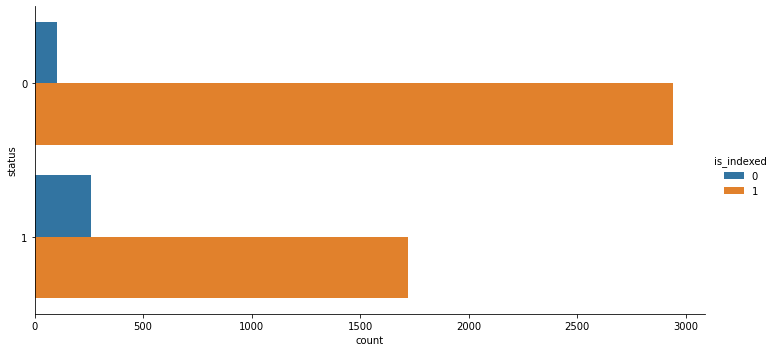

In [38]:
sb.catplot(data=indexstatus, y="status",hue="is_indexed",kind="count",aspect=2)

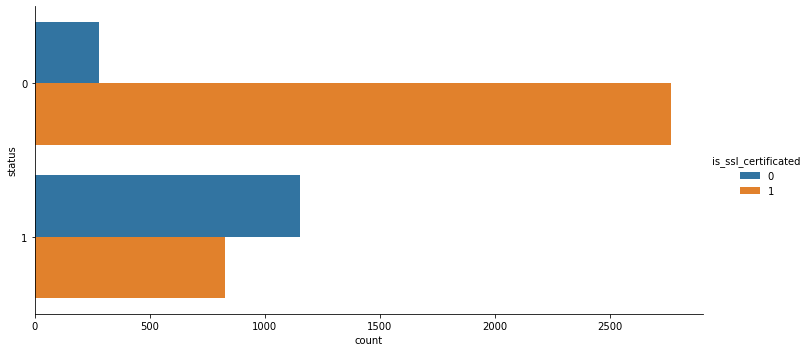

In [39]:
ssl=dfContent['is_ssl_certificated']
sslStatus=pd.concat([ssl,status],axis=1).reindex()
sb.catplot(data=sslStatus, y="status",hue="is_ssl_certificated",kind="count",aspect=2)

Results : We shall drop `is_domain_registered` and `is_domain_registrar_visible`

Safe URLs are `usually indexed` and `ssl certified`

Safe URL have domains that are usually established longer whereas malicious url uses volatile domains.

`[Note]` An older domain implies stability, authority, and a proven track record, all of which contribute to building trust among users.

`[Note]` : Newly registered/short term domain poses these threats :
1. Lack of reputation
2. Potential for fradulent activities
3. Short-term nature (cybercriminals sometimes register domain names for short-term use to carry out their illicit activities before the domain is flagged or blacklisted)
4. Lack of verification
5. Mimicking Established Brands

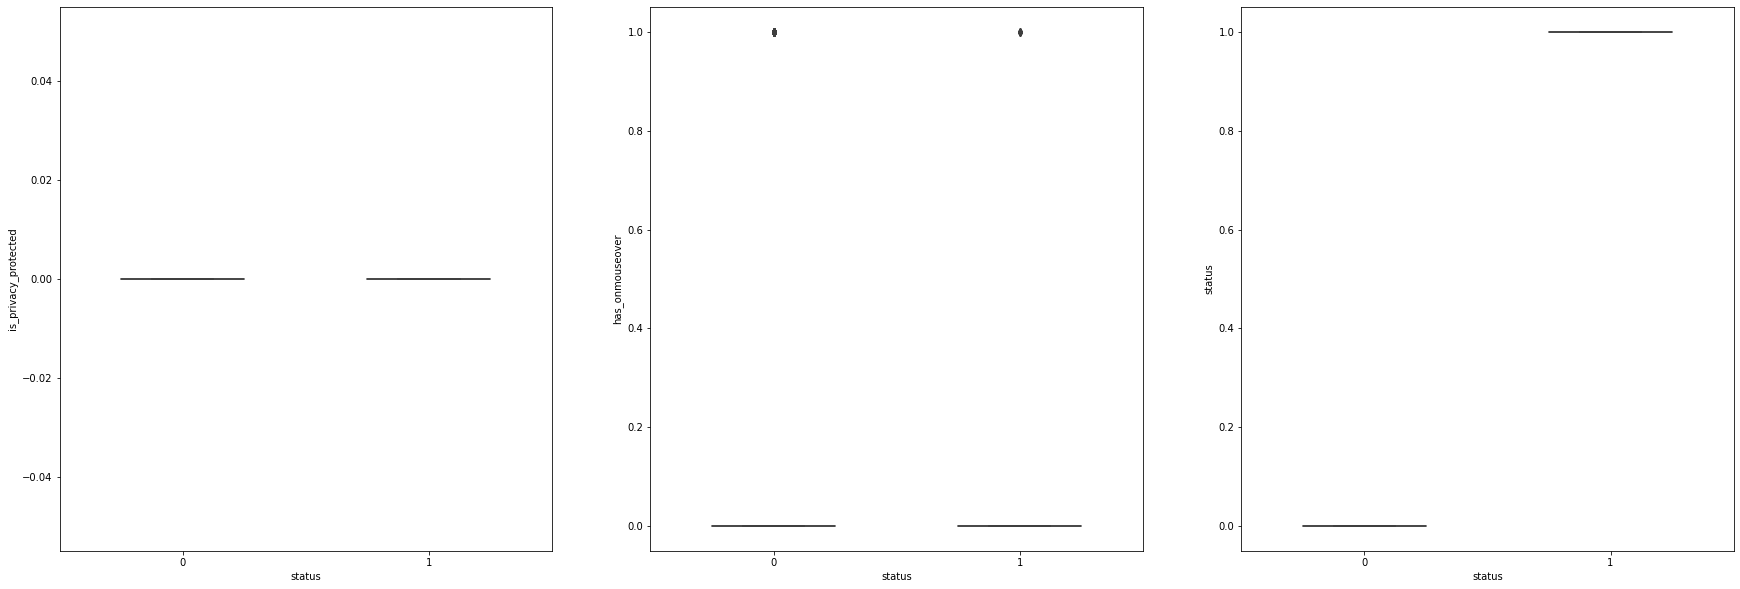

In [40]:
f,axes=plt.subplots(1,3,figsize=(30,10))

CBdf5=dfContent[["is_privacy_protected","has_onmouseover"]]
CBdf5subplot=pd.concat([CBdf5, status],axis=1).reindex()
count=0

for var in CBdf5subplot:
    sb.boxplot(x='status', y=var,data=CBdf5subplot,ax=axes[count],width=.5)
    count+=1

In [41]:
onmouseover=dfContent['has_onmouseover']
mouseStatus=pd.concat([onmouseover,status],axis=1).reindex()
mouseStatus.value_counts()


has_onmouseover  status
0                0         2975
                 1         1976
1                0           73
                 1            6
dtype: int64

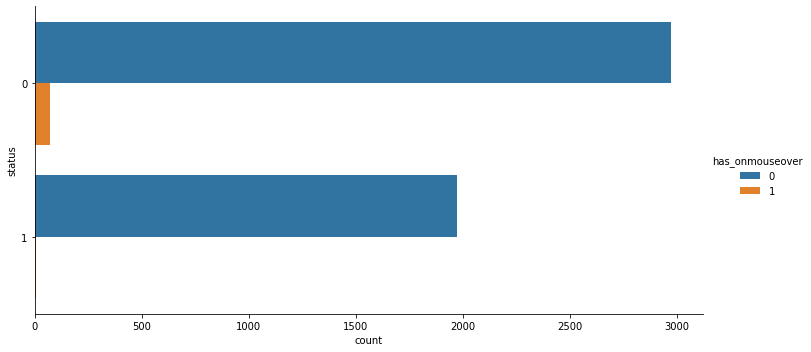

In [42]:
sb.catplot(data=mouseStatus, y="status",hue="has_onmouseover",kind="count",aspect=2)

We can drop `has_onmouseover` and `is_privacy_protected`

Total content based features to drop = `num_embed,num_redirect_diff_domain, right_click_disabled, is_domain_registered, is_domain_registrar_visible, has_onmouseover, is_privacy_protected`